In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.columns


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [ ]:
test.columns


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [ ]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [ ]:
train.shape


(31647, 18)

In [ ]:
test.shape


(13564, 17)

In [ ]:
train.head()


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
test.head()


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [ ]:
summary = train.describe().T
summary.loc[:, 'min':'max'] 
#five point summary consisting of min, Q1(25%), Q2(50%), Q3(75%)
# and max values of each numerical attributes

,min,25%,50%,75%,max
ID,2.0,11218.0,22519.0,33879.5,45211.0
age,18.0,33.0,39.0,48.0,95.0
balance,-8019.0,73.0,450.0,1431.0,102127.0
day,1.0,8.0,16.0,21.0,31.0
duration,0.0,104.0,180.0,318.5,4918.0
campaign,1.0,1.0,2.0,3.0,63.0
pdays,-1.0,-1.0,-1.0,-1.0,871.0
previous,0.0,0.0,0.0,0.0,275.0


In [ ]:
summary = test.describe().T
summary.loc[:, 'min':'max'] 
#five point summary consisting of min, Q1(25%), Q2(50%), Q3(75%)
# and max values of each numerical attributes

,min,25%,50%,75%,max
ID,1.0,11546.0,22782.0,33974.25,45206.0
age,18.0,33.0,39.0,48.00,95.0
balance,-3313.0,71.0,445.0,1413.25,98417.0
day,1.0,8.0,16.0,21.00,31.0
duration,0.0,102.0,180.0,319.00,3253.0
campaign,1.0,1.0,2.0,3.00,58.0
pdays,-1.0,-1.0,-1.0,-1.00,850.0
previous,0.0,0.0,0.0,0.00,55.0


In [ ]:
print('Missing values:\n', train.isnull().sum())
#checking for missing values in the dataset

Missing values:
 ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [ ]:
print('Missing values:\n', test.isnull().sum())
#checking for missing values in the dataset

Missing values:
 ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [ ]:
train.apply(lambda x: len(x.unique()))
#is used to count the number of unique values in each column of a pandas DataFrame

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [ ]:
test.apply(lambda x: len(x.unique()))
#is used to count the number of unique values in each column of a pandas DataFrame

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

Univariate analysis on the train dataset

In [ ]:
#Frequency of 'subscribed'
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

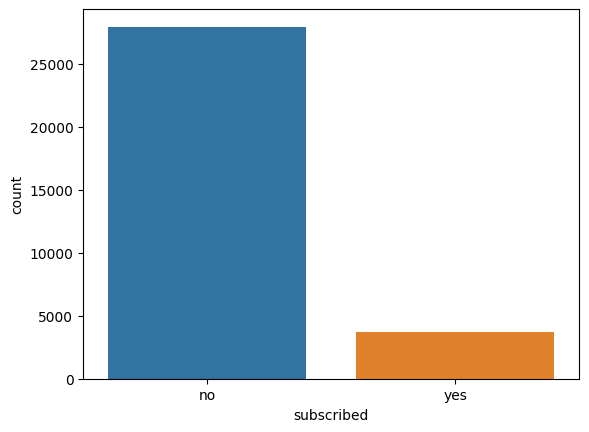

In [ ]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')


In [ ]:
#Normalizing the frequency table of 'Subscribed' variable
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

From the above analysis we can see that only 3,715 people out of 31,647 have subscribed which is roughly 12%

In [ ]:
#Frequency table
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

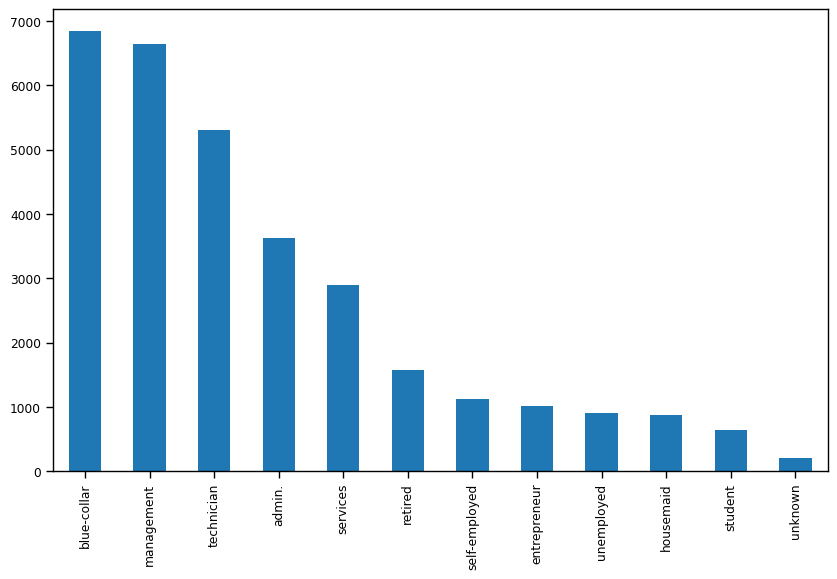

In [ ]:

# Plotting the job frequency table
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));


We can see that most of the clients beloned to blue-collar job and students are least in general as they don't make term deposits in general.

In [ ]:

train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

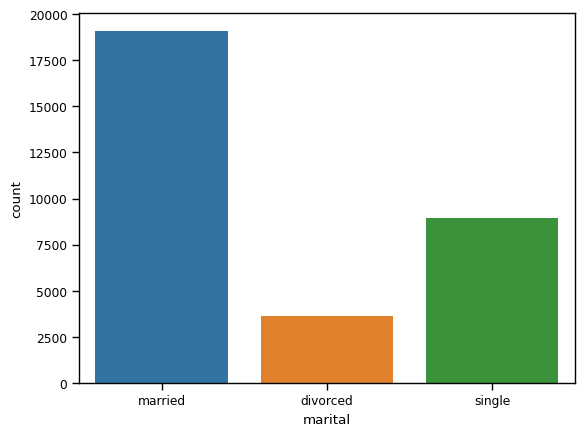

In [ ]:
sns.countplot(data=train, x='marital');

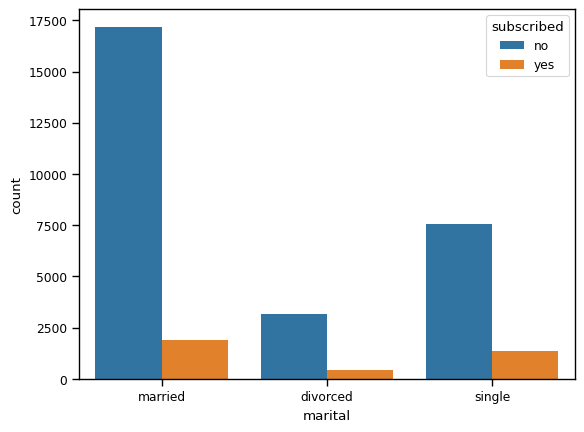

In [ ]:
sns.countplot(data=train, x='marital', hue='subscribed');


<ipython-input-32-68579e4eb087>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['age']);


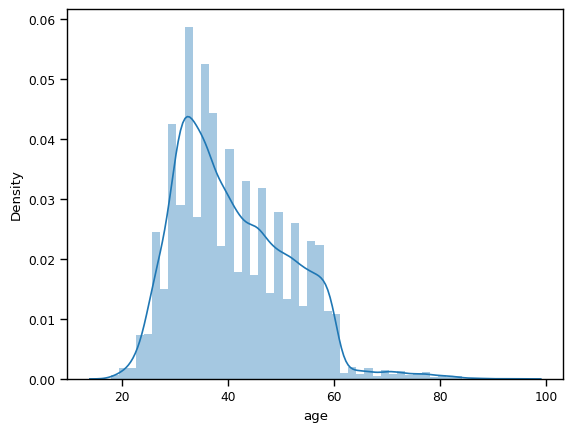

In [ ]:
sns.distplot(train['age']);

We can infer that most of the clients fall in the age group between 20-60.

Bivariate Analysis

In [ ]:
#job vs subscribed
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [ ]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

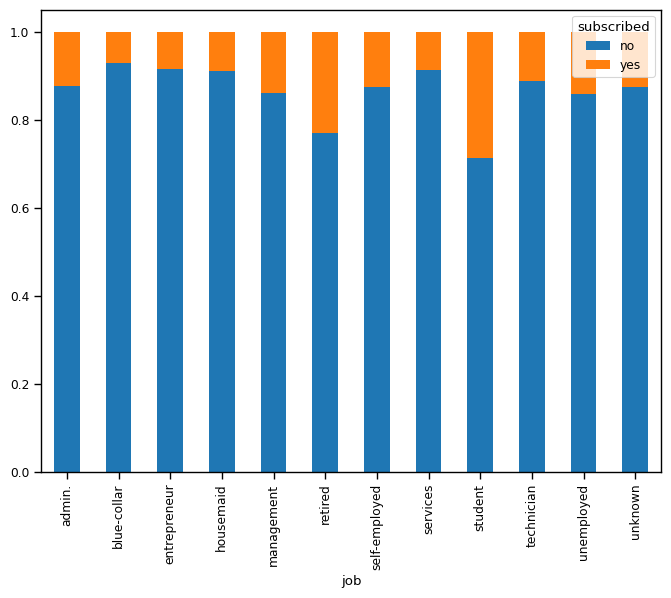

In [ ]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [ ]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [ ]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


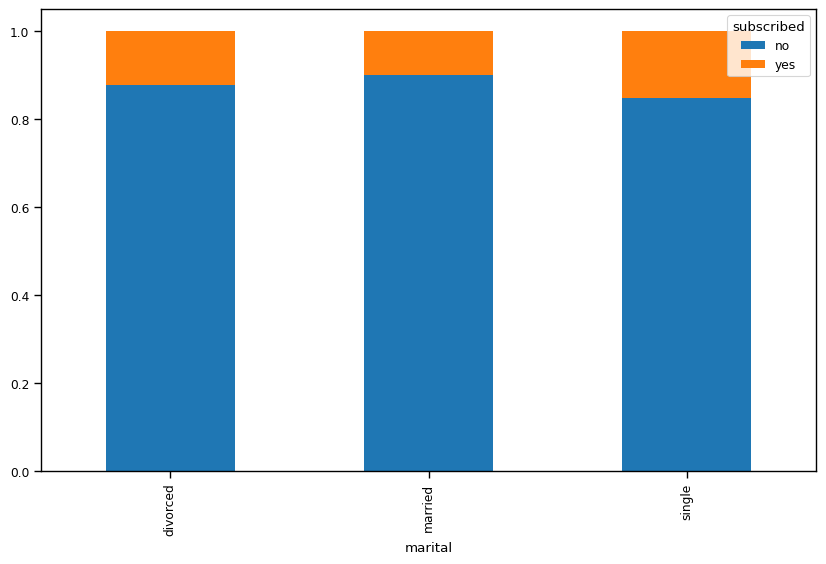

In [ ]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.



In [ ]:
#default vs subscription
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [ ]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

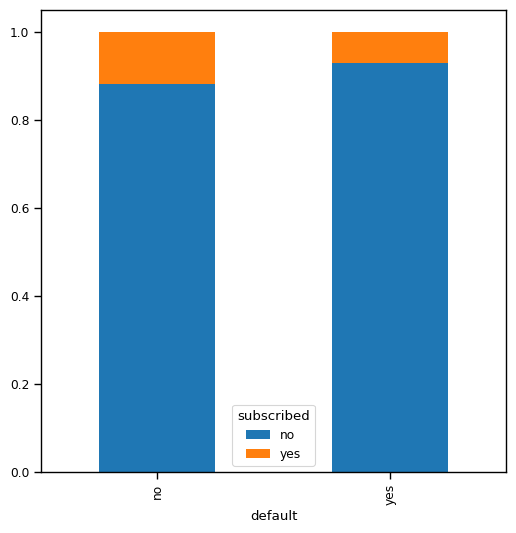

In [ ]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.



Text(0.5, 1.0, 'Status of Subscription of Term Deposit')

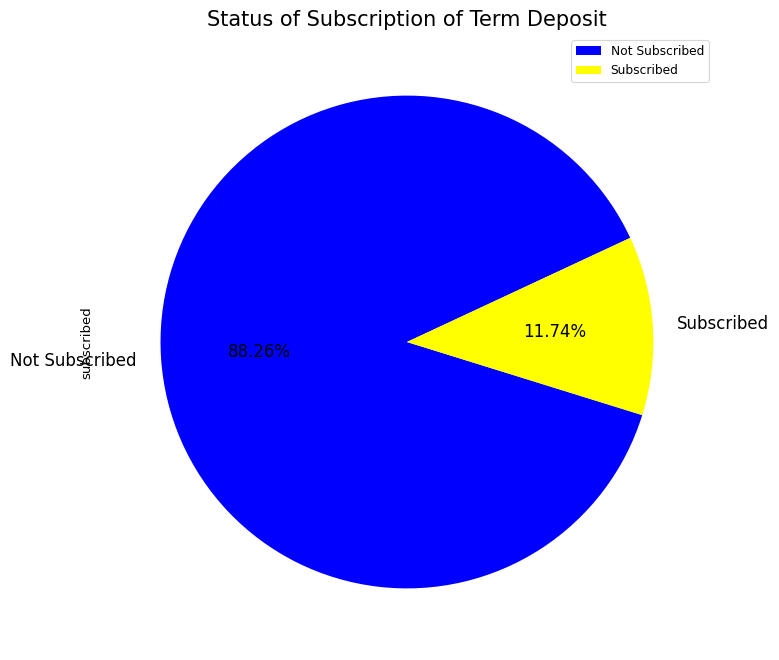

In [ ]:
plt.figure(figsize = (12, 8))

colors = ['blue', 'yellow']
labels = 'Not Subscribed', 'Subscribed'

train['subscribed'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', shadow = False, legend = True, colors = colors, 
                                labels = labels, fontsize = 12, startangle = 25)
plt.title('Status of Subscription of Term Deposit', fontsize = 15)

In [ ]:
# Converting the target variables into 0s and 1s
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [ ]:
train['subscribed']


0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [ ]:
#Correlation matrix
tc = train.corr()
tc

<ipython-input-45-7693badf16ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = train.corr()


,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

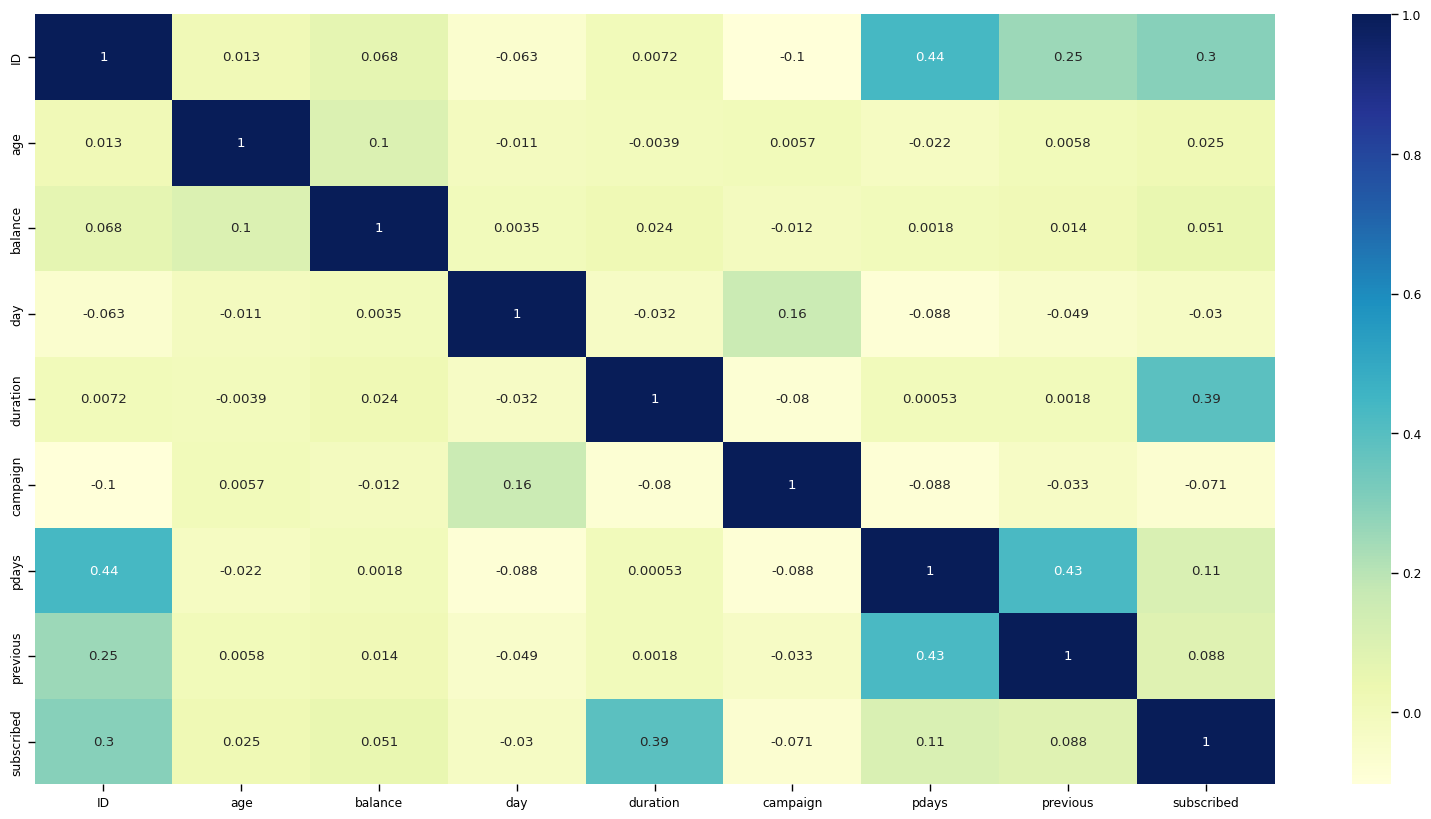

In [ ]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

#visualizing the correlation between the different features (columns) in the encoded DataFrame. 
#The resulting heatmap can help identify which features are highly correlated with each other, which can be useful for feature selection and model building.


We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.


Model Building


In [ ]:
target = train['subscribed']
train = train.drop('subscribed', axis=1)

In [ ]:
train = train.drop(['education'], axis=1)

In [ ]:
train = train.drop(['job',	'marital',	'default','housing',	'loan',	'contact','month','previous'], axis=1)

In [ ]:
train = train.drop(['ID'], axis=1)

In [ ]:
train

,age,balance,day,duration,campaign,pdays,poutcome
0,56,1933,19,44,2,-1,unknown
1,31,3,20,91,2,-1,unknown
2,27,891,18,240,1,-1,unknown
3,57,3287,22,867,1,84,success
4,31,119,4,380,1,-1,unknown
...,...,...,...,...,...,...,...
31642,29,0,12,116,2,-1,unknown
31643,53,380,5,438,2,-1,unknown
31644,32,312,7,37,3,-1,unknown
31645,57,225,15,22,7,337,failure


In [ ]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,age,balance,day,duration,campaign,pdays,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,19,44,2,-1,0,0,0,1
1,31,3,20,91,2,-1,0,0,0,1
2,27,891,18,240,1,-1,0,0,0,1
3,57,3287,22,867,1,84,0,0,1,0
4,31,119,4,380,1,-1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)


#Splitting the data into train and validation set such as to validate the results of our model on the validation set. 
#keeping 20% of the dataset as our validation set and the rest as our training set.

In [ ]:
print(X_train.dtypes)


age                 int64
balance             int64
day                 int64
duration            int64
campaign            int64
pdays               int64
poutcome_failure    uint8
poutcome_other      uint8
poutcome_success    uint8
poutcome_unknown    uint8
dtype: object


In [ ]:
print(y_train.dtypes)


int64


In [ ]:
print(X_val.dtypes)

age                 int64
balance             int64
day                 int64
duration            int64
campaign            int64
pdays               int64
poutcome_failure    uint8
poutcome_other      uint8
poutcome_success    uint8
poutcome_unknown    uint8
dtype: object


Now our data is ready and it's time to build our model and check its performance.

In [ ]:
# Train the XGBoost model
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'silent': 1.0,
    'n_estimators': 100
}

modelxgb = xgb.XGBClassifier(**params)
modelxgb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = modelxgb.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

# Display the evaluation results
print('Accuracy:', accuracy)
print('Classification report:')
print(report)


[16:06:33] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy: 0.8988941548183255
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5608
           1       0.61      0.32      0.42       722

    accuracy                           0.90      6330
   macro avg       0.76      0.65      0.68      6330
weighted avg       0.88      0.90      0.88      6330



Ensemble Models: Random Forest, Decision Tree

Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd



In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Calculating the accuracy
dt_score=accuracy_score(y_val,predict)
report = classification_report(y_val, predict)
print('Accuracy:', dt_score)
print('Classification report:')
print(report)

Accuracy: 0.8992101105845182
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5608
           1       0.61      0.31      0.41       722

    accuracy                           0.90      6330
   macro avg       0.77      0.64      0.68      6330
weighted avg       0.88      0.90      0.88      6330



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=0)


In [ ]:
# Fit the model on the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Make predictions on the testing data
predict1 = rfc.predict(X_val)
predict1

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Calculating the accuracy
rf_score=accuracy_score(y_val,predict1)
report = classification_report(y_val, predict1)
print('Accuracy:', rf_score)
print('Classification report:')
print(report)

Accuracy: 0.9015797788309636
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5608
           1       0.62      0.36      0.46       722

    accuracy                           0.90      6330
   macro avg       0.77      0.67      0.70      6330
weighted avg       0.89      0.90      0.89      6330



In [ ]:
modellists = []
modellists.append(['XGBoost', accuracy * 100])
modellists.append(['Decision Tree', dt_score * 100])
modellists.append(['Random Forest', rf_score * 100])


model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Score'])
model_df

,Model,Accuracy Score
0,XGBoost,89.889415
1,Decision Tree,89.921011
2,Random Forest,90.157978


**Basic Models**

**Logistic Regression Model** 

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
#creating an object of logistic regression model
lreg = LogisticRegression()

In [ ]:
#fitting the data into the model
lreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

In [ ]:
#Calculating the accuracy score
lr_score=accuracy_score(y_val,pred)
report = classification_report(y_val, pred)
print('Accuracy:', lr_score)
print('Classification report:')
print(report)

Accuracy: 0.8951026856240126
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5608
           1       0.59      0.28      0.37       722

    accuracy                           0.90      6330
   macro avg       0.75      0.63      0.66      6330
weighted avg       0.88      0.90      0.88      6330



**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#creating an object of KNN Classifier
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
#fitting the data into the model
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Making predictions on the validation set
y_pred_5 = knn5.predict(X_val)
y_pred_1 = knn1.predict(X_val)

In [ ]:
#Calculating the accuracy score
knn_score5 = accuracy_score(y_val, y_pred_5)
report5 = classification_report(y_val, y_pred_5)
print('Accuracy5:', knn_score5)
print('Classification report5:', report5)




Accuracy5: 0.8838862559241706
Classification report5:               precision    recall  f1-score   support

           0       0.91      0.96      0.94      5608
           1       0.48      0.27      0.35       722

    accuracy                           0.88      6330
   macro avg       0.70      0.62      0.64      6330
weighted avg       0.86      0.88      0.87      6330



**Support vector Classification**

In [ ]:
from sklearn.svm import SVC

In [ ]:
#creating an object of SVC
svc_model = SVC(kernel = 'rbf', gamma = 'scale')

In [ ]:
#fitting the data into the model
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
#Making predictions on the validation set
predictSVC = svc_model.predict(X_val)

In [ ]:
#Calculating the accuracy score
svm_score = accuracy_score(y_val,predictSVC)
report1 = classification_report(y_val, predictSVC)
print('Accuracy:', svm_score)
print('Classification report:')
print(report1)

Accuracy: 0.885781990521327
Classification report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5608
           1       0.47      0.01      0.02       722

    accuracy                           0.89      6330
   macro avg       0.68      0.50      0.48      6330
weighted avg       0.84      0.89      0.83      6330



**Gaussian Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
#creating an object
nb = GaussianNB()


In [ ]:
#fitting the data into the model
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Making predictions on the validation set
predictNB = nb.predict(X_val)

In [ ]:
#Calculating the accuracy score
gnb_score = accuracy_score(y_val,predictNB)
reportnb = classification_report(y_val, predictNB)
print('Accuracy:', gnb_score)
print('Classification report:')
print(reportnb)

Accuracy: 0.8477093206951026
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5608
           1       0.36      0.45      0.40       722

    accuracy                           0.85      6330
   macro avg       0.65      0.67      0.66      6330
weighted avg       0.86      0.85      0.85      6330



**Result of Standard Classification Models (in increasing order of Accuracy Score)**

In [ ]:
mdellists = []
mdellists.append(['Gaussian Naive Bayes', gnb_score * 100])
mdellists.append(['K-Nearest Neighbour', knn_score5 * 100])
mdellists.append(['Support Vector Classification', svm_score * 100])
mdellists.append(['Logistic Regression', lr_score * 100])

mdel_df = pd.DataFrame(mdellists, columns = ['Model', 'Accuracy Score'])
mdel_df

,Model,Accuracy Score
0,Gaussian Naive Bayes,84.770932
1,K-Nearest Neighbour,88.388626
2,Support Vector Classification,88.578199
3,Logistic Regression,89.510269


**Compare performances of all the models**

In [ ]:
mdelists = []
mdelists.append(['Gaussian Naive Bayes', gnb_score * 100])
mdelists.append(['K-Nearest Neighbour', knn_score5 * 100])
mdelists.append(['Support Vector Classification', svm_score * 100])
mdelists.append(['Logistic Regression', lr_score * 100])
mdelists.append(['XGBoost', accuracy * 100])
mdelists.append(['Decision Tree', dt_score * 100])
mdelists.append(['Random Forest', rf_score * 100])

mdl_df = pd.DataFrame(mdelists, columns = ['Model', 'Accuracy Score'])
mdl_df

,Model,Accuracy Score
0,Gaussian Naive Bayes,84.770932
1,K-Nearest Neighbour,88.388626
2,Support Vector Classification,88.578199
3,Logistic Regression,89.510269
4,XGBoost,89.889415
5,Decision Tree,89.921011
6,Random Forest,90.157978


**Graphical Representation of Classification Model vs. Accuracy Score**

Text(0.5, 1.0, 'Comparison of Classification Models')

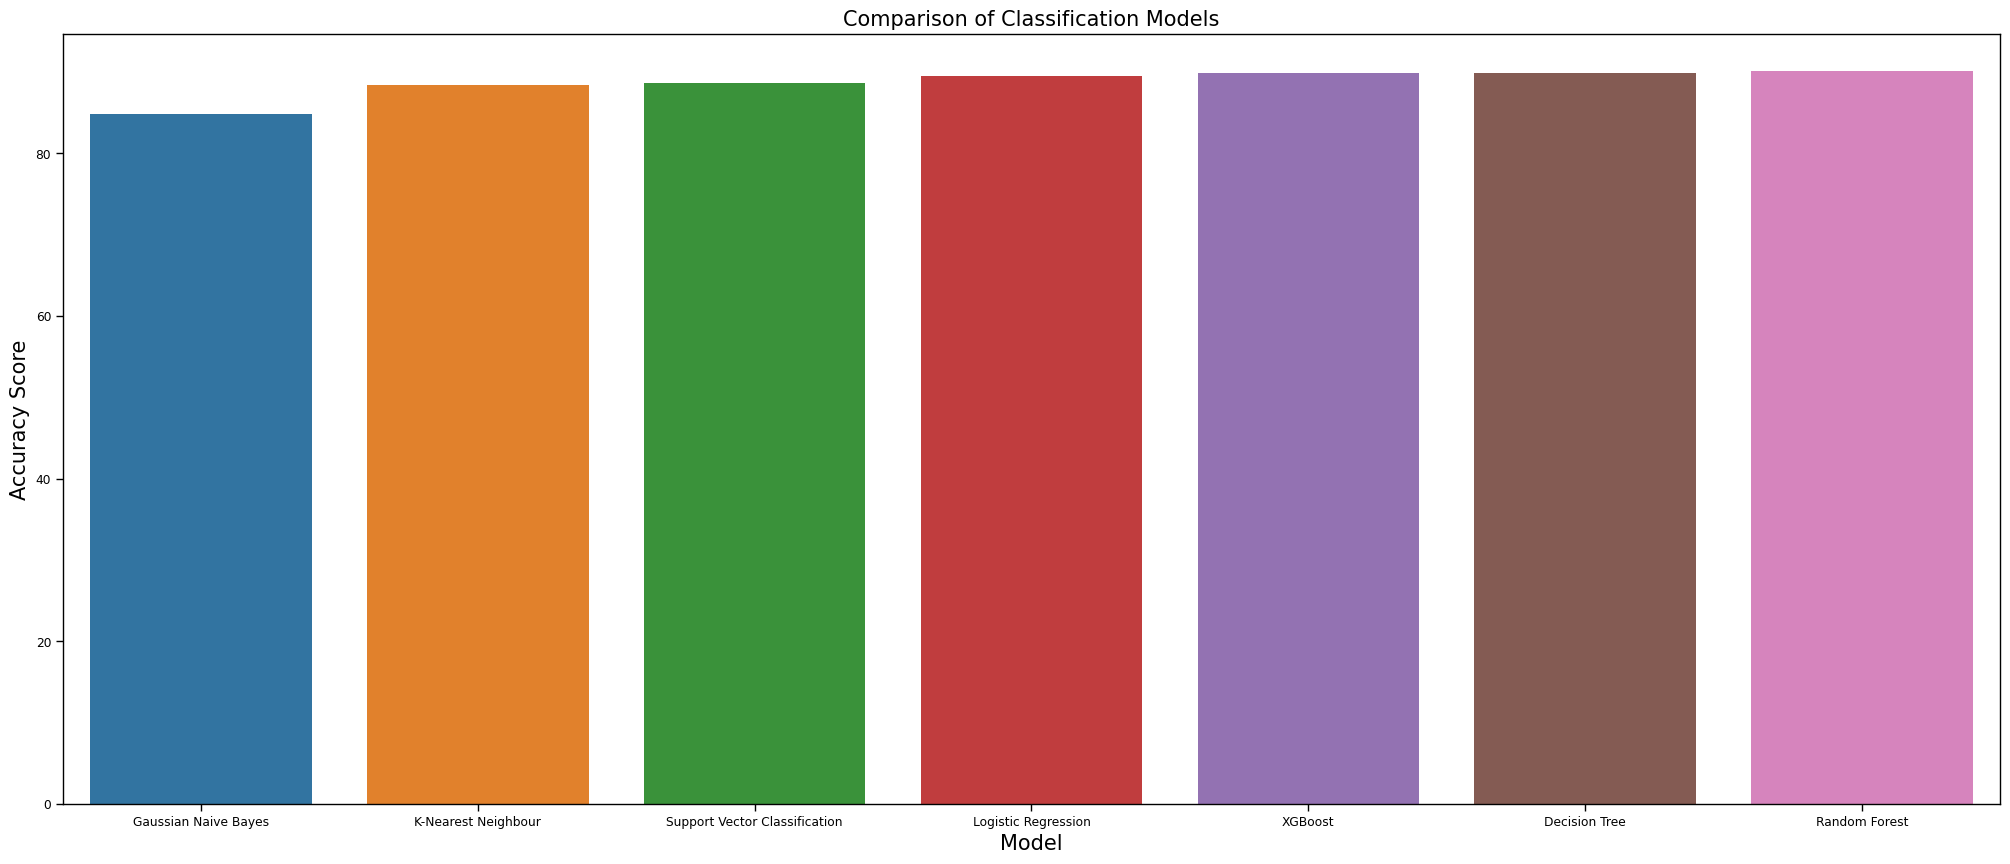

In [ ]:
plt.figure(figsize = (25, 10))
sns.barplot(x = mdl_df['Model'], y = mdl_df['Accuracy Score'], data = mdl_df)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Comparison of Classification Models', fontsize = 15)

max voting 

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('Naive Bayes', nb), ('Logistic',lreg), ('KNN', knn5),('SVM', svc_model), ('Decision tree', clf), ('Random Forest', rfc), ('XG Boost', modelxgb)],
    voting='hard')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_val)

accuracymax = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracymax)
reportmax = classification_report(y_val, y_pred)
print('Classification report:')
print(reportmax)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[16:38:41] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy: 0.8995260663507109
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5608
           1       0.62      0.30      0.40       722

    accuracy                           0.90      6330
   macro avg       0.77      0.64      0.67      6330
weighted avg       0.88      0.90      0.88      6330



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
#age	balance	day	duration	campaign	pdays	
def term_deposit_prediction(
age,
balance ,
day,
duration ,
campaign ,
pdays  ,
poutcome_failure,
poutcome_other ,
poutcome_success ,
poutcome_unknown):

    # Create a dictionary from the input values
    input_dict = {
'age':age,
'balance':balance ,
'day':day,
'duration':duration ,
'campaign':campaign ,
'pdays':pdays  ,
'poutcome_failure':poutcome_failure,
'poutcome_other':poutcome_other ,
'poutcome_success':poutcome_success ,
'poutcome_unknown':poutcome_unknown}

    # Convert the dictionary into a Pandas DataFrame
    input_df = pd.DataFrame.from_dict([input_dict])

    # Use the pre-trained model to make a prediction
    prediction = voting_clf.predict(input_df)

    # Return the prediction
    return prediction



In [ ]:
term_deposit_prediction( 37, 341, 3, 120, 2, -1, 0, 0, 0, 1)

array([0])

In [ ]:
!pip install -q streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 k

In [ ]:
test = pd.get_dummies(test)
train.head(50)

In [ ]:
test.to_csv('testt.csv', header=True, index=False)

In [ ]:
import gradio as gr
def term_deposit(
age,
balance ,
day,
duration ,
campaign ,
pdays  ,
poutcome_failure,
poutcome_other ,
poutcome_success ,
poutcome_unknown):
  x = np.array([
age,
balance ,
day,
duration ,
campaign ,
pdays  ,
poutcome_failure,
poutcome_other ,
poutcome_success ,
poutcome_unknown])
#   if((poutcome_failure != 1 or poutcome_failure != 0) or
# (poutcome_other !=1 or poutcome_other !=0) or
# (poutcome_success != 1 or poutcome_success != 0) or
# (poutcome_unknown !=1 or poutcome_unknown !=0)):
#     return "poutcome can't be other than 0 or 1"

  
  prediction = voting_clf.predict(x)
  if(prediction==0):
    return "Will not subscribe"
  else:
    return "Will subscribe"

outputs = gr.outputs.Textbox()

app = gr.Interface(fn=term_deposit,inputs=['number','number','number','number','number','number','number', 'number', 'number', 'number', 'number'], outputs=outputs,title="Term Deposit Prediction",description="Enter the values and check if the customer will subscribe to term deposit or not")

app.launch(share=True)

/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:880: UserWarning: Expected 10 arguments for function <function term_deposit at 0x7fc8c8228790>, received 11.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:888: UserWarning: Expected maximum 10 arguments for function <function term_deposit at 0x7fc8c8228790>, received 11.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3729edab4e82dec9a6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [ ]:
import streamlit as st


In [ ]:
!ls

sample_data  termdepo.py  test.csv  train.csv


In [ ]:
!pip install ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.0 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19879 sha256=e7add47502f0883d3938869fbfe7d6e824b4a89e92df348c16c6ab955d1ab184
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
!ngrok authtoken 2OorN0fcGGOR75PLpskvL6fJlpC_4kcA146F6F2ZDTR9FbboW

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!pgrep streamlit

In [ ]:
!streamlit run termdepo.py &>/dev/null&

In [ ]:
!pip install pyngrok --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyngrok import ngrok

In [ ]:
!streamlit run termdepo.py & npx localtunnel --port 8501

[############......] - refresh-package-json:localtunnel: timing action:finalize

npx: installed 22 in 2.842s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.132.229.45:8501

your url is: https://witty-worlds-begin-34-132-229-45.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2023-04-28 13:10:29.598 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py",